In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
train = pd.read_csv('train.csv')
train.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,C,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,D,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,C,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,C,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,B,9054


In [33]:
train.shape

(10000, 12)

In [34]:
train.isnull().sum()

Allied_Nations                  0
Diplomatic_Meetings_Set         0
Percent_Of_Forces_Mobilized     0
Hostile_Nations                 0
Active_Threats                  0
Inactive_Threats                0
Citizen_Fear_Index              0
Closest_Threat_Distance(km)     0
Aircraft_Carriers_Responding    0
Troops_Mobilized(thousands)     0
DEFCON_Level                    0
ID                              0
dtype: int64

In [35]:
test = pd.read_csv('test.csv')
test.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),ID
0,8,0,0.52,2,19.0,52.0,0.376652,319.06,1,976800.0,1
1,9,0,0.44,2,6.0,12.0,0.254772,351.92,1,1082400.0,10
2,8,0,0.44,3,7.0,18.0,0.472100,349.80,1,924000.0,14
3,10,0,0.39,2,3.0,13.0,0.478708,343.44,1,1003200.0,17
4,9,0,0.44,2,6.0,14.0,0.561674,346.62,1,924000.0,21


In [36]:
test.shape

(2500, 11)

In [37]:
test.isnull().sum()

Allied_Nations                  0
Diplomatic_Meetings_Set         0
Percent_Of_Forces_Mobilized     0
Hostile_Nations                 0
Active_Threats                  0
Inactive_Threats                0
Citizen_Fear_Index              0
Closest_Threat_Distance(km)     0
Aircraft_Carriers_Responding    0
Troops_Mobilized(thousands)     0
ID                              0
dtype: int64

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Allied_Nations                  10000 non-null int64
Diplomatic_Meetings_Set         10000 non-null int64
Percent_Of_Forces_Mobilized     10000 non-null float64
Hostile_Nations                 10000 non-null int64
Active_Threats                  10000 non-null float64
Inactive_Threats                10000 non-null float64
Citizen_Fear_Index              10000 non-null float64
Closest_Threat_Distance(km)     10000 non-null float64
Aircraft_Carriers_Responding    10000 non-null int64
Troops_Mobilized(thousands)     10000 non-null float64
DEFCON_Level                    10000 non-null object
ID                              10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


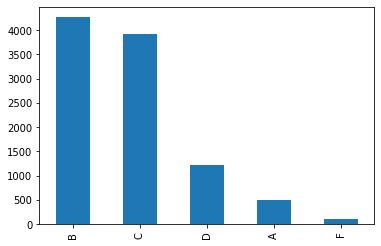

In [39]:
train['DEFCON_Level'].value_counts().plot(kind = 'bar')

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['DEFCON_Level'] = le.fit_transform(train['DEFCON_Level'])

In [41]:
x = train.drop(['ID', 'DEFCON_Level'], axis = 1)
y = train['DEFCON_Level']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.627


In [46]:
print(confusion_matrix(y_test, y_pred))

[[ 12  60  19   2   0]
 [ 14 619 193   7   1]
 [  5 233 511  65   0]
 [  1  18 115 112   0]
 [  0   1   4   8   0]]


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.13      0.19        93
           1       0.66      0.74      0.70       834
           2       0.61      0.63      0.62       814
           3       0.58      0.46      0.51       246
           4       0.00      0.00      0.00        13

    accuracy                           0.63      2000
   macro avg       0.44      0.39      0.40      2000
weighted avg       0.61      0.63      0.62      2000



In [51]:
x_train = train.drop(['ID', 'DEFCON_Level'], axis = 1)
y_train = train['DEFCON_Level']
x_test = test.drop('ID', axis = 1)

In [53]:
rf = RandomForestClassifier()
y_pred = rf.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'ID': test.ID, 'DEFCON_Level': y_pred})
solution.to_csv('Solution1.csv', index = False)